Nama Anggota:
- Stanley Ade 
- Vincent Jiu 
- Christian Ken 
- Sheffield Roderick

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('dataset.csv')
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [6]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [8]:
df.shape

(8763, 26)

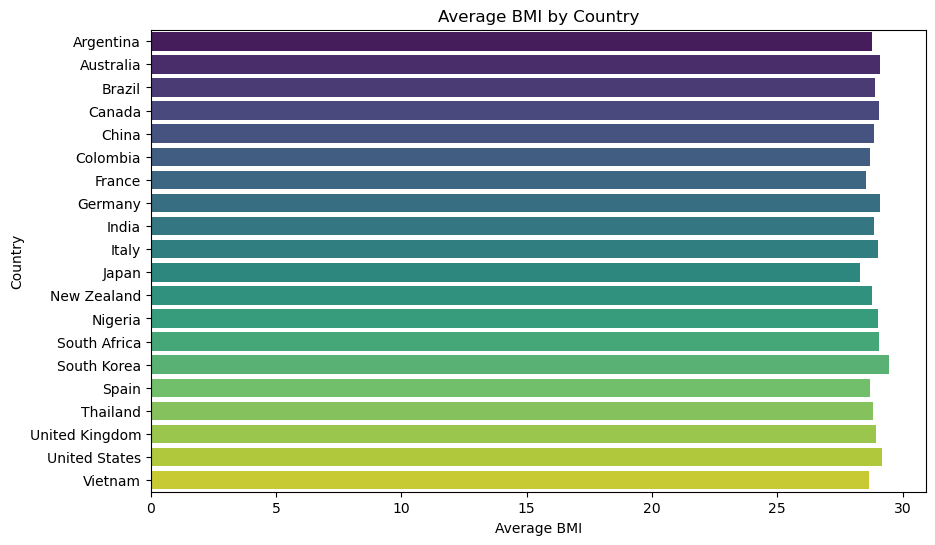

In [9]:
average_sleep = df.groupby('Country')['BMI'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='BMI', y='Country', data=average_sleep, palette='viridis')
plt.title('Average BMI by Country')
plt.xlabel('Average BMI')
plt.ylabel('Country')
plt.show()

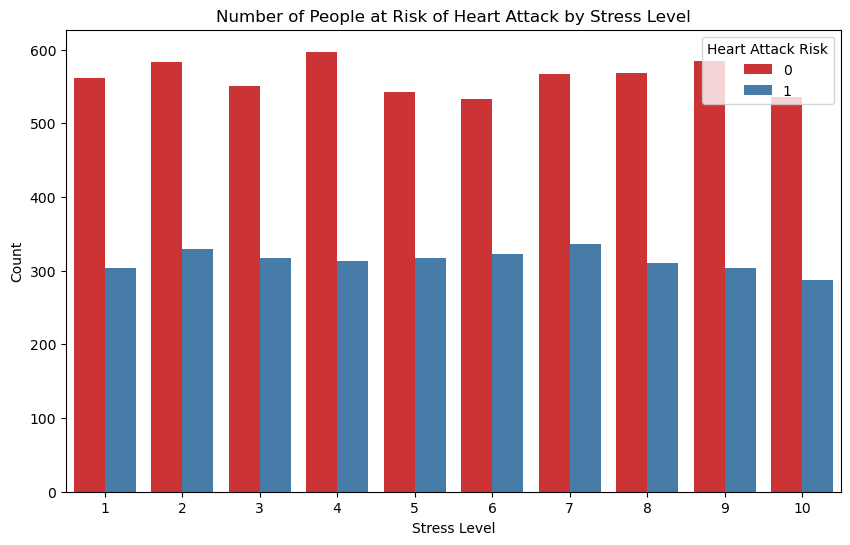

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Stress Level', hue='Heart Attack Risk', data=df, palette='Set1')
plt.title('Number of People at Risk of Heart Attack by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Heart Attack Risk')
plt.show()

## Data Preparation

In [7]:
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [8]:
df[['Sistolik', 'Diastolik']] = df['Blood Pressure'].str.split('/', expand=True).apply(pd.to_numeric)
df = df.drop('Blood Pressure', axis = 1)

In [9]:
df['Diet'] = df['Diet'].map({'Unhealthy': 1, 'Average': 2, 'Healthy': 3})
df['Gender'] = df['Sex'].map({'Male':1, 'Female':0})
df = df.drop('Sex', axis = 1)

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Country'] = label_encoder.fit_transform(df['Country'])
df['Continent'] = label_encoder.fit_transform(df['Continent'])
df['Hemisphere'] = label_encoder.fit_transform(df['Hemisphere'])

In [11]:
df.head()

,Patient ID,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Sistolik,Diastolik,Gender
0,BMW7812,67,208,72,0,0,1,0,0,4.168189,...,286,0,6,0,5,1,0,158,88,1
1,CZE1114,21,389,98,1,1,1,1,1,1.813242,...,235,1,7,3,4,0,0,165,93,1
2,BNI9906,21,324,72,1,0,0,0,0,2.078353,...,587,4,4,6,3,0,0,174,99,0
3,JLN3497,84,383,73,1,1,1,0,1,9.828130,...,378,3,4,3,4,0,0,163,100,1
4,GFO8847,66,318,93,1,1,1,1,0,5.804299,...,231,1,5,16,1,0,0,91,88,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   int64  
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

C:\Users\User\AppData\Local\Temp\ipykernel_3364\85112198.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.3, annot_kws={"size": 6})


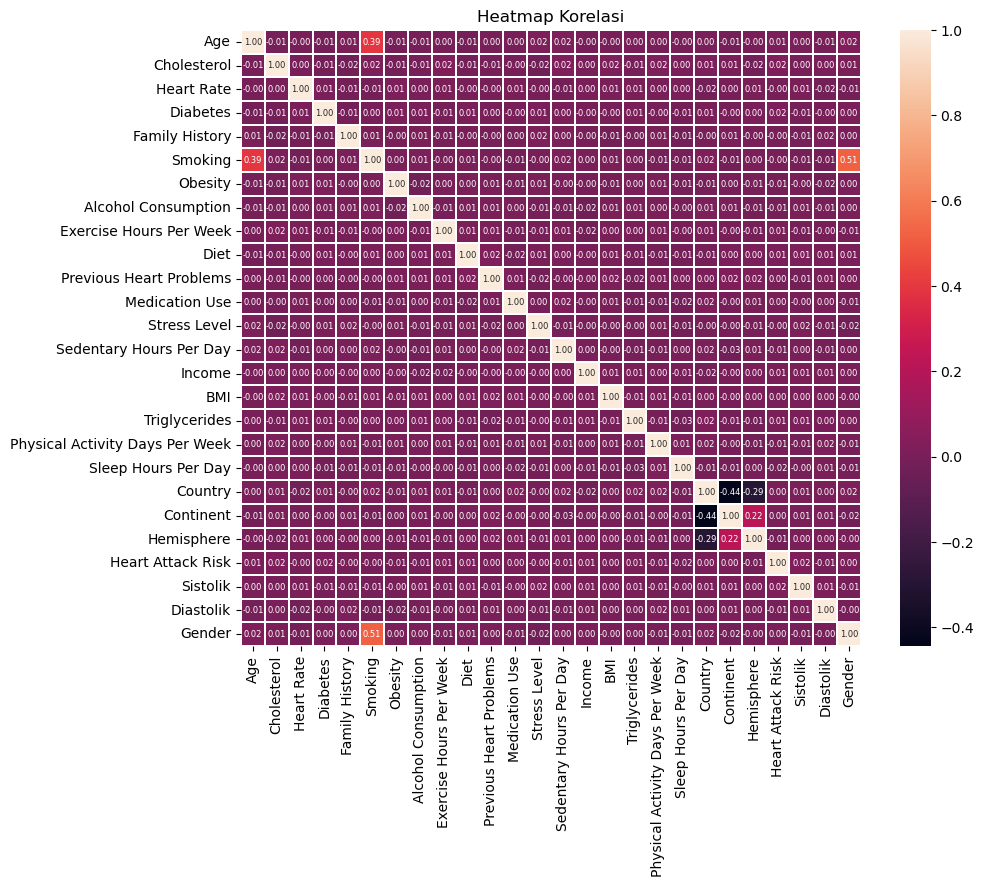

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.3, annot_kws={"size": 6})
plt.title('Heatmap Korelasi')
plt.show()

----

## Logistic Regression untuk faktor eksternal

In [14]:
x_lr = df[['Smoking', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Physical Activity Days Per Week', 'Sleep Hours Per Day']]
y_lr = df['Heart Attack Risk']

In [15]:
x_lr.head()

,Smoking,Alcohol Consumption,Exercise Hours Per Week,Diet,Medication Use,Stress Level,Sedentary Hours Per Day,Physical Activity Days Per Week,Sleep Hours Per Day
0,1,0,4.168189,2,0,9,6.615001,0,6
1,1,1,1.813242,1,0,1,4.963459,1,7
2,0,0,2.078353,3,1,9,9.463426,4,4
3,1,1,9.828130,2,0,9,7.648981,3,4
4,1,0,5.804299,1,0,6,1.514821,1,5


In [16]:
y_lr.head()

0    0
1    0
2    0
3    0
4    0
Name: Heart Attack Risk, dtype: int64

In [17]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(x_lr, y_lr, test_size=0.3, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_lr, y_train_lr)
lr_predictions = lr.predict(X_test_lr)

In [19]:
print("Accuracy:", accuracy_score(y_test_lr, lr_predictions))
print("Classification Report:\n", classification_report(y_test_lr, lr_predictions))

Accuracy: 0.6432103461392165
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1691
           1       0.00      0.00      0.00       938

    accuracy                           0.64      2629
   macro avg       0.32      0.50      0.39      2629
weighted avg       0.41      0.64      0.50      2629



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


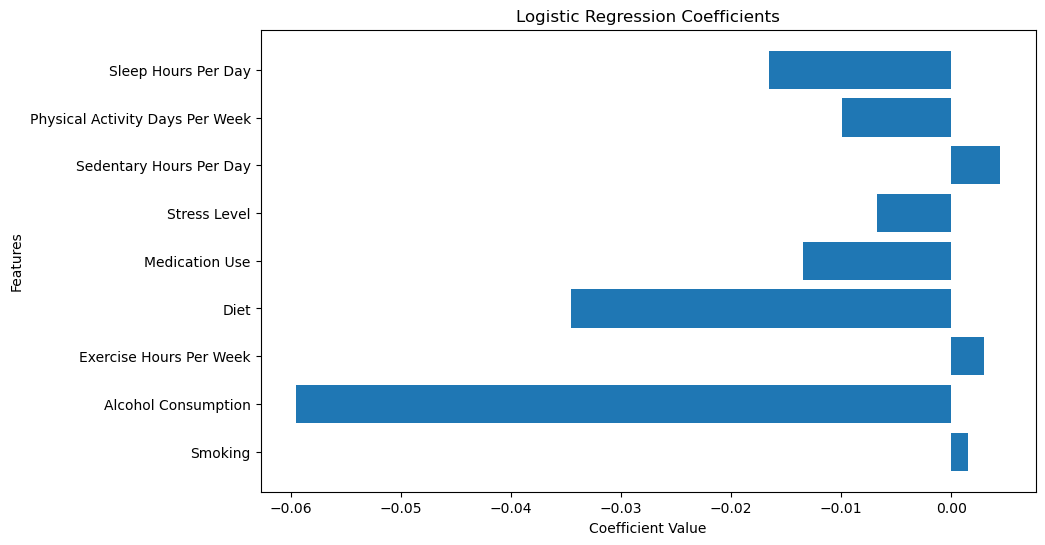

In [20]:
plt.figure(figsize=(10, 6))
plt.barh(x_lr.columns, lr.coef_[0])
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

In [21]:
print ('Coefficients: ', lr.coef_)
print ('Intercept: ', lr.intercept_)

Coefficients:  [[ 0.00152088 -0.05952509  0.00297713 -0.03454152 -0.01344784 -0.00677979
   0.00445978 -0.0099192  -0.01657223]]
Intercept:  [-0.33890816]


In [22]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(lr_predictions - y_test_lr)))
print("Residual sum of squares (MSE): %.2f" % np.mean(lr_predictions - y_test_lr) ** 2)
print("R2-score: %.2f" % r2_score(y_test_lr, lr_predictions))

Mean absolute error: 0.36
Residual sum of squares (MSE): 0.13
R2-score: -0.55


----

## Linear Regression

In [23]:
X_lin = df[['Age', 'Sistolik','Diastolik', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Sedentary Hours Per Day', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day']]
y_lin = df['Cholesterol']

In [24]:
X_lin.head()

,Age,Sistolik,Diastolik,Heart Rate,Diabetes,Family History,Smoking,Obesity,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day
0,67,158,88,72,0,0,1,0,6.615001,31.251233,286,0,6
1,21,165,93,98,1,1,1,1,4.963459,27.194973,235,1,7
2,21,174,99,72,1,0,0,0,9.463426,28.176571,587,4,4
3,84,163,100,73,1,1,1,0,7.648981,36.464704,378,3,4
4,66,91,88,93,1,1,1,1,1.514821,21.809144,231,1,5


In [25]:
y_lin.head()

0    208
1    389
2    324
3    383
4    318
Name: Cholesterol, dtype: int64

In [26]:
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_lin, y_lin, test_size=0.3, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(X_train_lin, y_train_lin)
lin_predictions = lin.predict(X_test_lin)

In [28]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_lin, lin_predictions)
print(f'Mean Squared Error: {mse}')
print('Coefficients:', lin.coef_)
print('Intercept:', lin.intercept_)

Mean Squared Error: 6401.215378342756
Coefficients: [-1.01341265e-01  4.77815392e-02  6.27085994e-02 -8.28041257e-03
 -1.63619424e+00 -3.35421311e+00  7.07339738e+00 -1.95212745e+00
  4.38437866e-01  1.28215506e-01 -7.36642557e-04  5.12525489e-01
  4.26395559e-01]
Intercept: 241.25676826346916


## Random Forest Classifier

In [29]:
x_rfc = df.drop(columns=['Patient ID', 'Heart Attack Risk'])
y_rfc = df['Heart Attack Risk']

In [30]:
x_rfc.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Sistolik,Diastolik,Gender
0,67,208,72,0,0,1,0,0,4.168189,2,...,31.251233,286,0,6,0,5,1,158,88,1
1,21,389,98,1,1,1,1,1,1.813242,1,...,27.194973,235,1,7,3,4,0,165,93,1
2,21,324,72,1,0,0,0,0,2.078353,3,...,28.176571,587,4,4,6,3,0,174,99,0
3,84,383,73,1,1,1,0,1,9.828130,2,...,36.464704,378,3,4,3,4,0,163,100,1
4,66,318,93,1,1,1,1,0,5.804299,1,...,21.809144,231,1,5,16,1,0,91,88,1


In [31]:
y_rfc.head()

0    0
1    0
2    0
3    0
4    0
Name: Heart Attack Risk, dtype: int64

In [32]:
X_train_rfc, X_test_rfc, y_train_rfc, y_test_rfc = train_test_split(x_rfc, y_rfc, test_size=0.3, random_state=42)

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train_rfc, y_train_rfc)
rfc_predictions = rfc.predict(X_test_rfc)

In [34]:
print("\nAccuracy:", accuracy_score(y_test_rfc, rfc_predictions))
print("Classification Report:\n", classification_report(y_test_rfc, rfc_predictions))


Accuracy: 0.6386458729554964
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.98      0.78      1691
           1       0.38      0.02      0.04       938

    accuracy                           0.64      2629
   macro avg       0.51      0.50      0.41      2629
weighted avg       0.55      0.64      0.51      2629



In [35]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(rfc_predictions - y_test_rfc)))
print("Residual sum of squares (MSE): %.2f" % np.mean(rfc_predictions - y_test_rfc) ** 2)
print("R2-score: %.2f" % r2_score(y_test_rfc, rfc_predictions))

Mean absolute error: 0.36
Residual sum of squares (MSE): 0.11
R2-score: -0.57


-----

## Assosiation Rules untuk faktor kategorikal

In [36]:
from mlxtend.frequent_patterns import association_rules, apriori

In [37]:
ark = df[['Gender','Diabetes','Family History','Smoking','Obesity','Alcohol Consumption', 'Previous Heart Problems', 'Heart Attack Risk']]

In [38]:
ark_items = apriori(ark, min_support = 0.01, use_colnames = True)
ark_items

C:\Users\User\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.697364,(Gender)
1,0.652288,(Diabetes)
2,0.492982,(Family History)
3,0.896839,(Smoking)
4,0.501426,(Obesity)
...,...,...
250,0.012553,"(Diabetes, Obesity, Gender, Previous Heart Pro..."
251,0.024421,"(Smoking, Diabetes, Obesity, Gender, Previous ..."
252,0.018601,"(Smoking, Obesity, Gender, Previous Heart Prob..."
253,0.015976,"(Smoking, Diabetes, Obesity, Previous Heart Pr..."


In [39]:
rules = association_rules(ark_items, metric='support', min_threshold=0.2)
rules.sort_values('confidence', ascending =False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
100,"(Gender, Alcohol Consumption)",(Smoking),0.417551,0.896839,0.417551,1.000000,1.115027,0.043075,inf,0.177116
106,"(Previous Heart Problems, Gender)",(Smoking),0.346228,0.896839,0.346228,1.000000,1.115027,0.035717,inf,0.157794
267,"(Alcohol Consumption, Gender, Obesity)",(Smoking),0.204382,0.896839,0.204382,1.000000,1.115027,0.021084,inf,0.129662
211,"(Diabetes, Gender, Obesity)",(Smoking),0.231428,0.896839,0.231428,1.000000,1.115027,0.023874,inf,0.134224
225,"(Diabetes, Gender, Alcohol Consumption)",(Smoking),0.273536,0.896839,0.273536,1.000000,1.115027,0.028218,inf,0.142004
...,...,...,...,...,...,...,...,...,...,...
173,(Smoking),"(Family History, Previous Heart Problems)",0.896839,0.243296,0.220472,0.245833,1.010428,0.002275,1.003364,0.100043
155,(Smoking),"(Diabetes, Heart Attack Risk)",0.896839,0.237590,0.211343,0.235653,0.991850,-0.001737,0.997466,-0.073780
260,(Smoking),"(Family History, Gender, Alcohol Consumption)",0.896839,0.209403,0.209403,0.233490,1.115027,0.021602,1.031424,1.000000
288,(Smoking),"(Gender, Previous Heart Problems, Alcohol Cons...",0.896839,0.209061,0.209061,0.233109,1.115027,0.021567,1.031357,1.000000


In [40]:
heart_attack_rules = rules[rules['consequents'] == {'Heart Attack Risk'}]
heart_attack_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
24,(Diabetes),(Heart Attack Risk),0.652288,0.358211,0.237590,0.364241,1.016834,0.003933,1.009485,0.047612
152,"(Smoking, Diabetes)",(Heart Attack Risk),0.585074,0.358211,0.211343,0.361225,1.008415,0.001764,1.004719,0.020111
111,"(Smoking, Gender)",(Heart Attack Risk),0.697364,0.358211,0.250485,0.359188,1.002729,0.000682,1.001526,0.008994
13,(Gender),(Heart Attack Risk),0.697364,0.358211,0.250485,0.359188,1.002729,0.000682,1.001526,0.008994
40,(Smoking),(Heart Attack Risk),0.896839,0.358211,0.320666,0.357552,0.998161,-0.000591,0.998975,-0.017547
49,(Alcohol Consumption),(Heart Attack Risk),0.598083,0.358211,0.211001,0.352795,0.984882,-0.003239,0.991633,-0.036787


In [41]:
sorted_rules = heart_attack_rules.sort_values(by='support', ascending=False)
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
40,(Smoking),(Heart Attack Risk),0.896839,0.358211,0.320666,0.357552,0.998161,-0.000591,0.998975,-0.017547
111,"(Smoking, Gender)",(Heart Attack Risk),0.697364,0.358211,0.250485,0.359188,1.002729,0.000682,1.001526,0.008994
13,(Gender),(Heart Attack Risk),0.697364,0.358211,0.250485,0.359188,1.002729,0.000682,1.001526,0.008994
24,(Diabetes),(Heart Attack Risk),0.652288,0.358211,0.237590,0.364241,1.016834,0.003933,1.009485,0.047612
152,"(Smoking, Diabetes)",(Heart Attack Risk),0.585074,0.358211,0.211343,0.361225,1.008415,0.001764,1.004719,0.020111
49,(Alcohol Consumption),(Heart Attack Risk),0.598083,0.358211,0.211001,0.352795,0.984882,-0.003239,0.991633,-0.036787


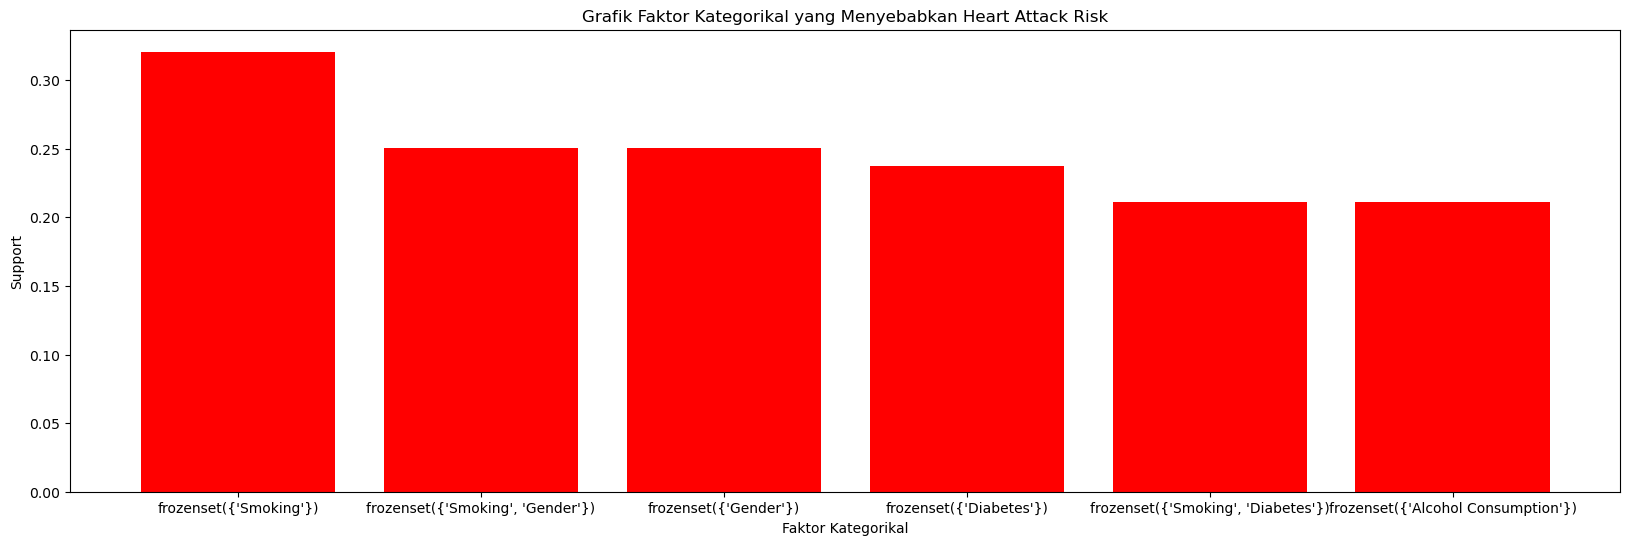

In [42]:
plt.figure(figsize=(20, 6))
plt.bar(sorted_rules['antecedents'].astype(str), sorted_rules['support'], color='red')
plt.xlabel('Faktor Kategorikal')
plt.ylabel('Support')
plt.title('Grafik Faktor Kategorikal yang Menyebabkan Heart Attack Risk')
plt.show()

----

## Clustering faktor internal

In [43]:
X_clus = df[['Age','Cholesterol','Heart Rate', 'BMI','Sistolik','Diastolik','Triglycerides']]

In [44]:
from sklearn.preprocessing import StandardScaler

Clus_dataset = StandardScaler().fit_transform(X_clus)
Clus_dataset

array([[ 6.25557131e-01, -6.41578894e-01, -1.47042098e-01, ...,
         8.70044389e-01,  1.93781814e-01, -5.88539270e-01],
       [-1.53932232e+00,  1.59689495e+00,  1.11817855e+00, ...,
         1.13571444e+00,  5.34480428e-01, -8.16487136e-01],
       [-1.53932232e+00,  7.93023127e-01, -1.47042098e-01, ...,
         1.47729021e+00,  9.43318765e-01,  7.56800093e-01],
       ...,
       [-3.15694803e-01, -1.22154025e-01,  1.45881488e+00, ...,
         9.83902981e-01, -6.92034583e-01,  4.88626134e-01],
       [-8.33383367e-01, -1.01259666e+00, -7.30990089e-01, ...,
        -6.10117296e-01, -1.23715237e+00, -1.35730462e+00],
       [-1.35107193e+00,  1.18877541e+00, -1.05510022e-03, ...,
         1.10987115e-01, -1.23715237e+00, -1.06231327e+00]])

In [45]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(Clus_dataset)
    wcss.append(kmeans.inertia_)

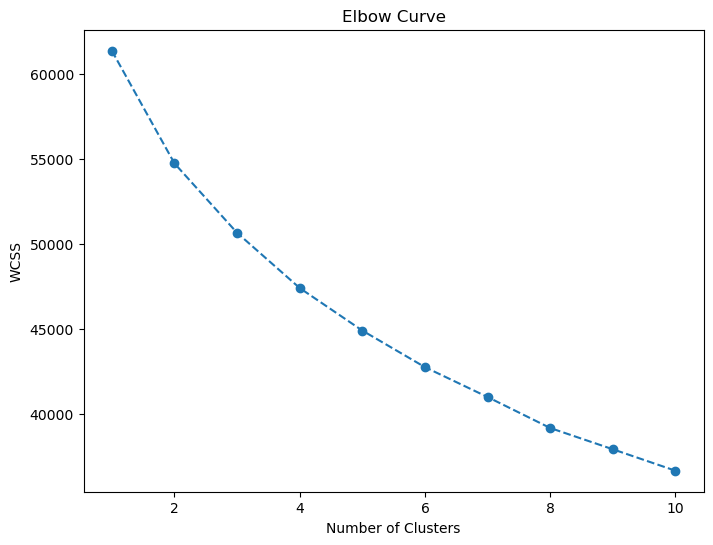

In [46]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [47]:
diff = np.diff(wcss)

elbow_index = np.argmax(diff < 0.05) + 1
optimal_clusters = elbow_index + 1

print(f"Jumlah klaster optimal: {optimal_clusters}")

Jumlah klaster optimal: 2


In [48]:
k_means = KMeans(init = "k-means++", n_clusters = 2, n_init = 12)
k_means.fit(Clus_dataset)

KMeans(n_clusters=2, n_init=12)

In [49]:
X_clus['Clus_km'] = k_means.labels_
X_clus.head()

C:\Users\User\AppData\Local\Temp\ipykernel_3364\1316466423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clus['Clus_km'] = k_means.labels_


,Age,Cholesterol,Heart Rate,BMI,Sistolik,Diastolik,Triglycerides,Clus_km
0,67,208,72,31.251233,158,88,286,0
1,21,389,98,27.194973,165,93,235,1
2,21,324,72,28.176571,174,99,587,1
3,84,383,73,36.464704,163,100,378,0
4,66,318,93,21.809144,91,88,231,0


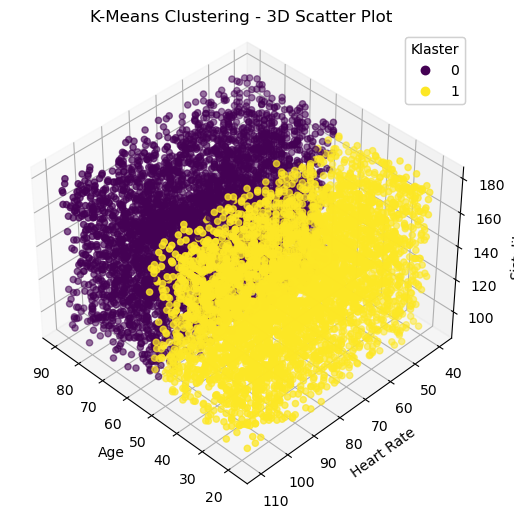

In [50]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(10, 6))
plt.clf()
ax = fig.add_subplot(111, projection='3d', elev=40, azim=135)
ax.set_xlabel('Age')
ax.set_ylabel('Heart Rate')
ax.set_zlabel('Sistolik')

scatter = ax.scatter(X_clus['Age'], X_clus['Heart Rate'], X_clus['Sistolik'], c=X_clus['Clus_km'].astype(float))
legend1 = ax.legend(*scatter.legend_elements(), title="Klaster")
ax.add_artist(legend1)

plt.title('K-Means Clustering - 3D Scatter Plot')
plt.show()

In [51]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(Clus_dataset, k_means.labels_)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.10700599500059561
